In [1]:
import pylifted
import numpy as np
import matplotlib.pyplot as plt
import pywt
import functools

In [2]:
pylifted.get_vectorization_info()

{'vectorized': True, 'vector length': 32}

In [3]:
pywt.wavelist();

In [4]:
n1, n2 = 1024, 1024
x = np.linspace(-10, 10, n1)
x2 = np.linspace(-10, 10, n2)
y = 1/(x**2 + 4)

y2 = 1/((x - 2)[:, None]**2 + (x2+3)**2 + 4)

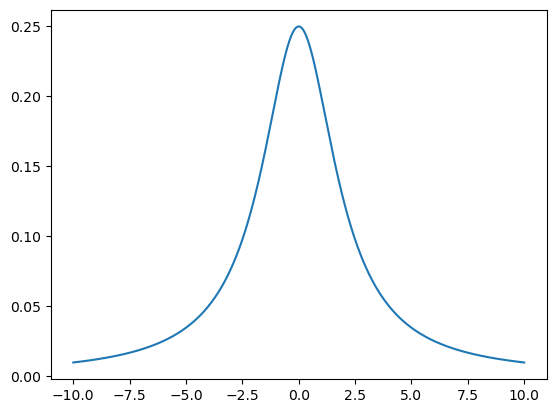

In [5]:
plt.plot(x, y)

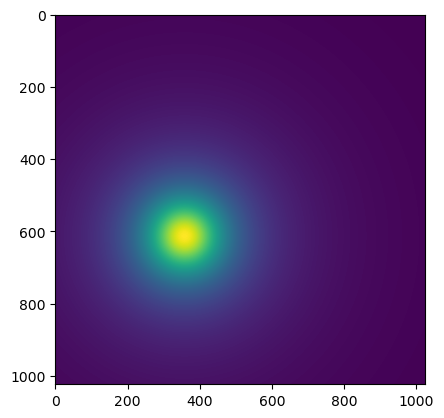

In [6]:
plt.imshow(y2)

In [14]:
wvlt = 'bior4.2'
yw_bior31 = pylifted.lwt(y, wavelet=wvlt, mode='symmetric', level=1)
yw_bior31IT = pylifted.lwt_adjoint(y, wavelet=wvlt, mode='symmetric', level=1)
y_r = pylifted.ilwt(yw_bior31, wavelet=wvlt, mode='symmetric', level=1)

In [15]:
np.allclose(y, y_r)

True

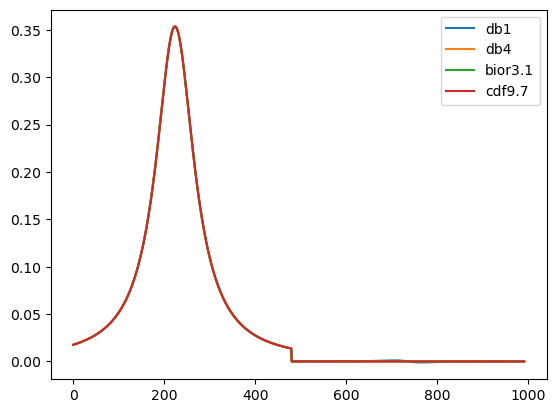

In [18]:
plt.plot(pylifted.lwt(y, wavelet='db1', mode='symmetric', level=1)[32:], label='db1')
#plt.plot(pylifted.lwt(y, wavelet='db2', mode='symmetric', level=1)[32:], label='db2')
#plt.plot(pylifted.lwt(y, wavelet='db3', mode='symmetric', level=1)[32:], label='db3')
plt.plot(pylifted.lwt(y, wavelet='db4', mode='symmetric', level=1)[32:], label='db4')

#plt.plot(pylifted.lwt(y, wavelet='bior4.2', mode='symmetric', level=1)[32:], label='bior4.2')
plt.plot(pylifted.lwt(y, wavelet='bior3.1', mode='symmetric', level=1)[32:], label='bior3.1')
plt.plot(pylifted.lwt(y, wavelet='cdf9.7', mode='symmetric', level=1)[32:], label='cdf9.7')
plt.legend()

In [21]:
y_pywt = pywt.dwt2(y2, 'bior3.1', mode='zero')

In [22]:
y_lift = pylifted.lwt(y2, 'bior3.1', mode='reflect')

In [23]:
y_pywt[0].shape

(513, 513)

In [24]:
y_lift.shape

(1024, 1024)

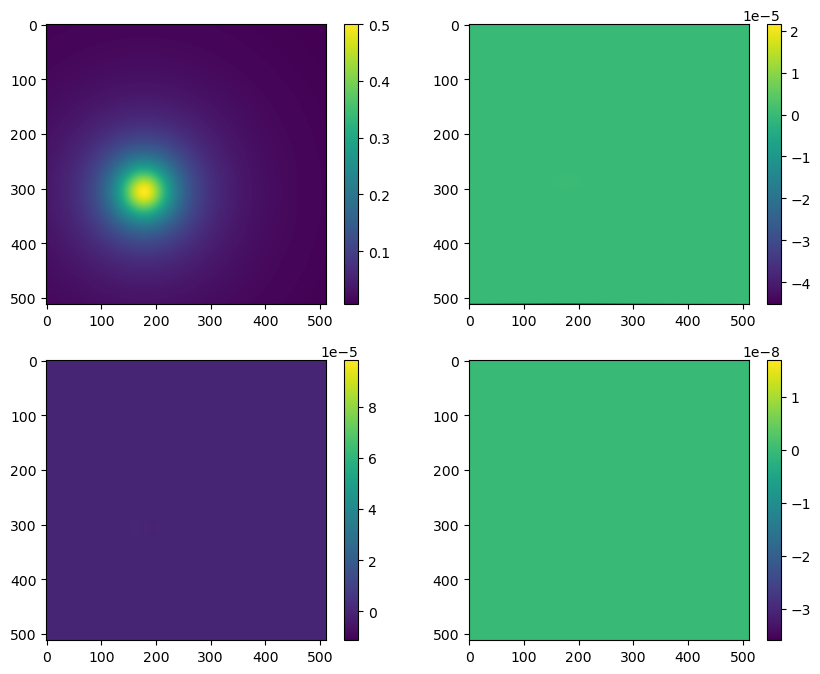

In [25]:
n1s = (n1 + 1) // 2
n2s = (n2 + 1) // 2
plt.figure(figsize=(10, 8))
plt.subplot(2, 2, 1)
plt.imshow(y_lift[:n1s, : n2s])
plt.colorbar()
plt.subplot(2, 2, 2)
plt.imshow(y_lift[n1s:, : n2s])
plt.colorbar()
plt.subplot(2, 2, 3)
plt.imshow(y_lift[:n1s, n2s:])
plt.colorbar()
plt.subplot(2, 2, 4)
plt.imshow(y_lift[n1s:, n2s:])
plt.colorbar()

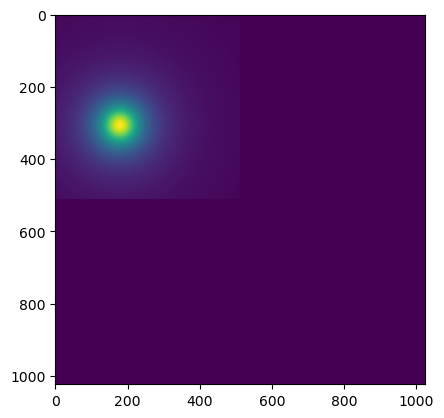

In [26]:
y2_w = pylifted.lwt(y2, wavelet='bior3.1', mode='reflect', level=1)
y2_r = pylifted.ilwt(y2_w, wavelet='bior3.1', mode='reflect', level=1)

plt.imshow(y2_w)

In [27]:
n1 = 23

u = np.random.rand(n1)
v = np.random.rand(n1)

wvlt = 'bior3.1'
mode = 'zero'
axes = (0, 1)

func = functools.partial(pylifted.lwt, wavelet=wvlt, mode=mode)
funcT = functools.partial(pylifted.lwt_adjoint, wavelet=wvlt, mode=mode)

v_dot_Fu = v.dot(func(u))
FTv_dot_u = funcT(v).dot(u)

v_dot_Fu, FTv_dot_u

(np.float64(4.1350702273654285), np.float64(4.1350702273654285))

In [28]:
n1, n2 = 23, 41

u = np.random.rand(n1, n2)
v = np.random.rand(n1, n2)

v_dot_Fu = v.reshape(-1).dot(func(u, level=(0, 0)).reshape(-1))
FTv_dot_u = funcT(v, level=(0, 0)).reshape(-1).dot(u.reshape(-1))

v_dot_Fu, FTv_dot_u

(np.float64(3.520127880190227), np.float64(3.5201278801902305))

In [29]:
n1, n2, n3 = 14, 23, 41

u = np.random.rand(n1, n2, n3)
v = np.random.rand(n1, n2, n3)

v_dot_Fu = v.reshape(-1).dot(func(u, axes=(1, 0), level=(0, 1)).reshape(-1))
FTv_dot_u = funcT(v, axes=(1, 0), level=(0, 1)).reshape(-1).dot(u.reshape(-1))

v_dot_Fu, FTv_dot_u

(np.float64(1029.4041809026733), np.float64(1029.4041809026733))

In [30]:
n1, n2, n3 = 14, 23, 41

u = np.random.rand(n1, n2, n3)
v = np.random.rand(n1, n2, n3)

v_dot_Fu = v.reshape(-1).dot(func(u, axes=(2, 0)).reshape(-1))
FTv_dot_u = funcT(v, axes=(2, 0)).reshape(-1).dot(u.reshape(-1))

v_dot_Fu, FTv_dot_u

(np.float64(1751.7336860533464), np.float64(1751.7336860533464))

In [86]:
n1 = 23

u = np.random.rand(n1)
v = np.random.rand(n1)

wvlt = 'bior3.1'
mode = 'reflect'
axes = (0, 1)

func = functools.partial(pylifted.lwt, wavelet=wvlt, mode=mode)

v_dot_u = v.dot(u)
ITv_dot_Fu = func(v, forward=False, adjoint=True).dot(func(u))

v_dot_u, ITv_dot_Fu

(np.float64(5.581594897009998), np.float64(5.581594897009998))

In [87]:
n1, n2 = 23, 41

u = np.random.rand(n1, n2)
v = np.random.rand(n1, n2)

v_dot_Fu = v.reshape(-1).dot(func(u).reshape(-1))
FTv_dot_u = func(v, adjoint=True).reshape(-1).dot(u.reshape(-1))

v_dot_Fu, FTv_dot_u

(np.float64(111.93191705708256), np.float64(111.93191705708256))

In [31]:
%%timeit
pylifted.lwt(y2, wavelet='db6', mode='periodic', level=1, n_threads=1)

8.04 ms ± 458 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [32]:
%%timeit
pylifted.lwt(y2, wavelet='db5', mode='reflect', level=1, n_threads=16)

4.13 ms ± 82.9 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [33]:
%%timeit
pywt.dwt2(y2, 'db6', mode='per')

19.4 ms ± 606 μs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [35]:
%%timeit
pylifted.lwt(y2, wavelet='db5', mode='reflect', level=(3, 3), n_threads=16)

4.49 ms ± 99.8 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
